# SARIMA (Seasonal ARIMA)

- Where ARIMA accepts the parameters pdq, SARIMA accepts an additional set of parameters (PDQ)m that specifically describe the seasonal components of the model
- Here P, D, and Q represent the seasonal regression, differencing, and moving average coeficients, and m represents the number of data points (rows) in each seasonal cycle
- The statsmodels implementation of SARIMA is called SARIMAX. The X added to the name means that the function also supports exogenous regressor variables. We'll cover this in a future lecture.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\co2_mm_mlo.csv")

In [7]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
df['Date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': 1})

In [9]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
df.set_index(['Date'], inplace=True)

In [11]:
df.index.freq = 'MS'

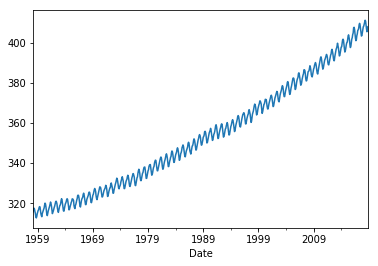

In [12]:
df['interpolated'].plot()

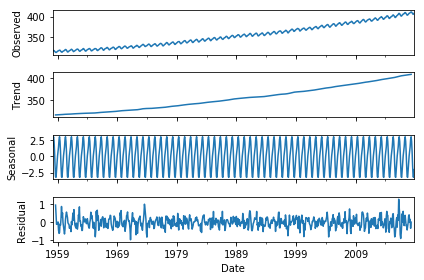

In [13]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

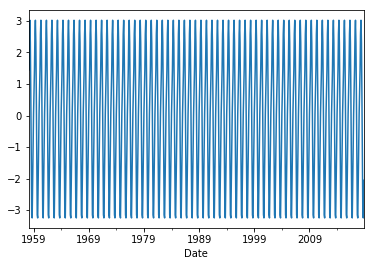

In [14]:
result.seasonal.plot()

In [15]:
# 12 months per year which is the seasonal freq
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\U

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.384
Date:                            Fri, 03 Jan 2020   AIC                            428.768
Time:                                    09:24:02   BIC                            451.720
Sample:                                         0   HQIC                           437.624
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.168e-05      0.000      0.413      0.679      -0.000       0.000
ma.L1         -0.3625      0.035    -10.446      0.000      -0.430      -0.294
ar.S.L12       0.9996      0.000   2943.066      0.000       0.999       1.000
ma.S.L12      -0.8643      0.022    -39.424      0.000      -0.907      -0.821
sigma2         0.0967      0.005     20.223      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       50.65   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.12   Prob(JB):                         0.17
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
len(df)

729

In [17]:
train = df.iloc[:717]
test = df.iloc[717:]

In [18]:
model = SARIMAX(train['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))

In [19]:
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Fri, 03 Jan 2020   AIC                            418.296
Time:                                    09:32:32   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3711      0.034    -10.798      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3177.243      0.000       0.999       1.000
ma.S.L12      -0.8647      0.023    -37.638      0.000      -0.910      -0.820
sigma2         0.0960      0.005     20.205      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.96   Jarque-Bera (JB):                 3.78
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start = len(train)
end = len(train) + len(test) - 1

In [24]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

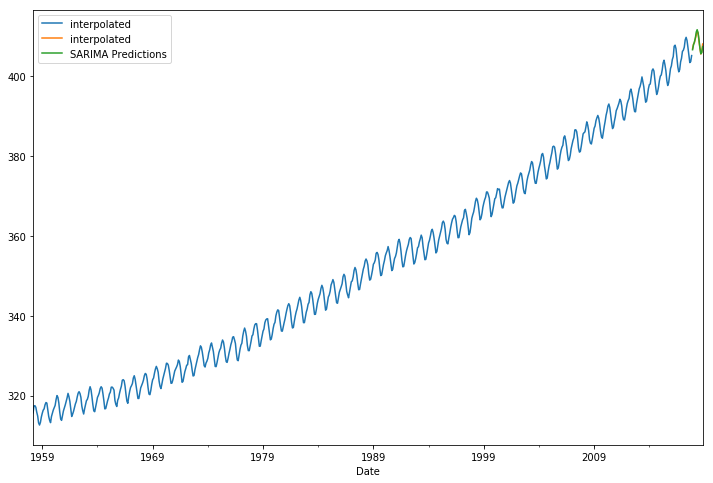

In [27]:
train['interpolated'].plot(legend=True, figsize=(12, 8))
test['interpolated'].plot(legend=True, figsize=(12, 8))
predictions.plot(legend=True)

In [28]:
from statsmodels.tools.eval_measures import rmse

In [29]:
rmse(test['interpolated'], predictions)

0.3462581828202496

In [30]:
test['interpolated'].mean()

408.3333333333333

# Forecast

In [31]:
model = SARIMAX(df['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

In [34]:
fcast = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA Forecast')

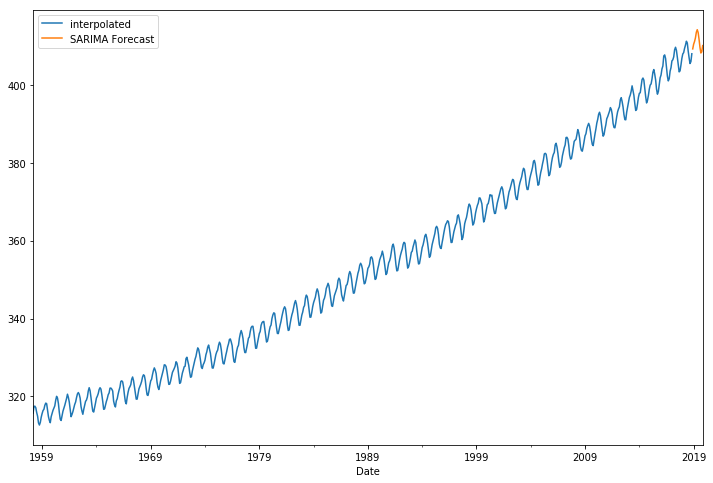

In [35]:
df['interpolated'].plot(legend=True, figsize=(12, 8))
fcast.plot(legend=True)